In [31]:
import json
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [32]:
from my_datasets import CMUPanopticHandDataset_2,MPIIHandDataset

In [39]:
partition_file = '/home/deyingk/handpose/data/external/rovit/intermediate_1/partition.json'
dataset_root = '/home/deyingk/handpose/data/external/rovit/intermediate_1/'
with open(partition_file, 'r') as f:
    partition_dict = json.load(f)
train_lst = partition_dict['train']

In [43]:
with open(dataset_root +'labels.json','r') as f:
    all_labels = json.load(f)

In [45]:
image_name = partition_dict['train'][10]
label = all_labels[image_name]

In [46]:
im = Image.open(dataset_root +'imgs/'+ image_name)

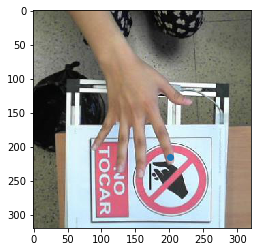

In [55]:
plt.imshow(im)
plt.scatter(label[8][0], label[8][1])

In [18]:
label[0]

[61.764202584960856, 108.9294094941406]

In [7]:
partition_dict['train'][0]

'Alexander_a_visit_to_the_cafe.flv_000023_r.jpg'

In [5]:
dataset[0]

{'original_image_size': array([172, 171]),
 'image': tensor([[[ 0.4508,  0.4508,  0.4508,  ...,  0.5364,  0.5364,  0.5364],
          [ 0.4508,  0.4508,  0.4508,  ...,  0.5364,  0.5364,  0.5364],
          [ 0.4508,  0.4508,  0.4508,  ...,  0.5364,  0.5364,  0.5364],
          ...,
          [-1.5357, -1.5357, -1.5357,  ..., -1.7240, -1.7240, -1.7240],
          [-1.5357, -1.5357, -1.5357,  ..., -1.7240, -1.7240, -1.7240],
          [-1.5357, -1.5357, -1.5357,  ..., -1.7240, -1.7240, -1.7240]],
 
         [[ 0.3978,  0.3978,  0.3978,  ...,  0.4503,  0.4503,  0.4503],
          [ 0.3978,  0.3978,  0.3978,  ...,  0.4503,  0.4503,  0.4503],
          [ 0.3978,  0.3978,  0.3978,  ...,  0.4503,  0.4503,  0.4503],
          ...,
          [-1.3179, -1.3179, -1.2829,  ..., -1.3529, -1.3529, -1.3529],
          [-1.3179, -1.3179, -1.2829,  ..., -1.3529, -1.3529, -1.3529],
          [-1.3179, -1.3179, -1.2829,  ..., -1.3529, -1.3529, -1.3529]],
 
         [[ 0.7576,  0.7576,  0.7576,  ...,  0.8

In [5]:
partition_file = '/home/deyingk/handpose/data/external/cmu_panoptic_hands/intermediate_1/partitions/partition.json'
dataset_root = '/home/deyingk/handpose/data/external/cmu_panoptic_hands/intermediate_1/'
with open(partition_file, 'r') as f:
    partition_dict = json.load(f)
train_lst = partition_dict['train']
dataset = CMUPanopticHandDataset_2(train_lst, dataset_root)

the dataset contains 11853 instances!


In [8]:
gm_kernels = dataset[2]['gm_kernels']

In [9]:
gm_kernels.shape

torch.Size([40, 45, 45])

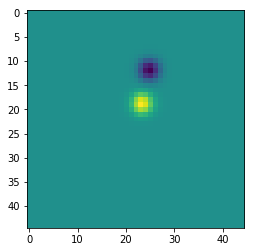

In [26]:
plt.imshow(gm_kernels.numpy()[0] -gm_kernels.numpy()[15] )

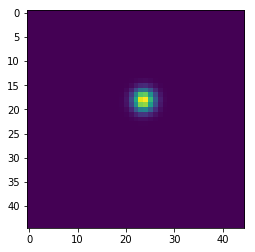

In [19]:
plt.imshow(gm_kernels.numpy()[1])

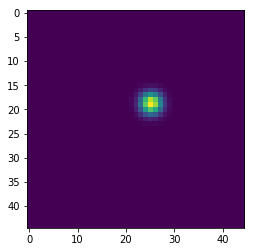

In [20]:
plt.imshow(gm_kernels.numpy()[2])

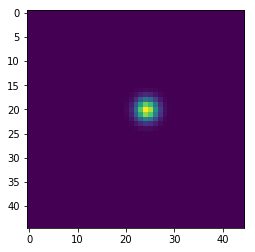

In [21]:
plt.imshow(gm_kernels.numpy()[3])

In [27]:
gm_kernels.device

device(type='cpu')

In [28]:
def generate_gaussian_groundtruth(labels, sigma=1, resol=46):
    """
    cpu version of generate_gaussian_groundtruth. 4x speed up.
    Implemented on 10/26/2018. Works fine.

    Args: 
        labels, torch.Tensor, 21*2, first column is x(horizontal),
                second column is y(vertical, from top to bottom)

    Returns:
        heatmaps, torch.Tensor, 21*46*46   
    """
    #labels = torch.from_numpy(labels).float().cuda()
    labels = labels
    # construct 3-D tensor a, which stores (column(x), row(y)) for each pixel 
    a = torch.zeros((resol,resol,2))
    a[...,0] = a[...,0] + torch.Tensor(range(resol)).unsqueeze(0)
    a[...,1] = a[...,1] + torch.Tensor(range(resol)).unsqueeze(1)
    a = a.unsqueeze(0)
    labels = labels.unsqueeze(-2).unsqueeze(-2)
    exponent = torch.sum((a - labels)**2, dim=-1)
    heatmaps = torch.exp(-exponent / 2.0 / sigma / sigma)
    return heatmaps

In [38]:
gs = generate_gaussian_groundtruth(torch.tensor([[6.,7.]]),sigma=5)

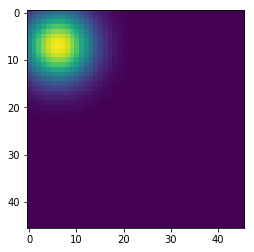

In [39]:
plt.imshow(gs.numpy()[0])